<a href="https://colab.research.google.com/github/domingomery/visioncolab/blob/main/image-processing/IMG01_Arroces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Imágen desde Dropbox

In [ ]:
!wget https://www.dropbox.com/s/xuyg77ebbiw3liq/onerice.bmp

--2022-08-16 16:10:11--  https://www.dropbox.com/s/xuyg77ebbiw3liq/onerice.bmp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xuyg77ebbiw3liq/onerice.bmp [following]
--2022-08-16 16:10:11--  https://www.dropbox.com/s/raw/xuyg77ebbiw3liq/onerice.bmp
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6880fbc8fa2df98e210d4aa8cb.dl.dropboxusercontent.com/cd/0/inline/BrIp91sXPE7szcEK8Nz_lXmSTaxDynAKyyqNWQ_rZbfFsi6V7boLUDS0Co-86S4WlaPWdxvF_h5v-wjApffyLGjBwzVY7urzYMavbQZYM9GFKVGQ27d46vdnoRhXrzIf-s5_gk6hMqopSIFs-4hkXnawdbCTYUMvLSL9XG8U6nr5ww/file# [following]
--2022-08-16 16:10:11--  https://uc6880fbc8fa2df98e210d4aa8cb.dl.dropboxusercontent.com/cd/0/inline/BrIp91sXPE7szcEK8Nz_lXmSTaxDynAKyyqNWQ_rZbfFsi6V7boLUDS0Co-86S4WlaPWd

# Importación de Librerías

In [ ]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt


# Lectura y Despliegue de Imagen

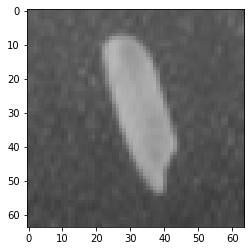

In [ ]:
img = imread('onerice.bmp')
plt.imshow(img)
plt.show()

# Función de cómo es la imagen

In [ ]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

howis(img)

size =  (64, 64, 3)
max  =  183
min  =  59


# Selección del primer canal de la imagen

size =  (64, 64)
max  =  183
min  =  59


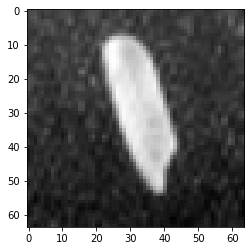

In [ ]:
X = img[:,:,0]
howis(X)
plt.imshow(X,cmap='gray')
plt.show()

# Función de Segmentación por Umbral

In [ ]:
def segmenta(X,t):
  (N,M) = X.shape
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y


# Segmentación

area =  597
size =  (64, 64)
max  =  255.0
min  =  0.0


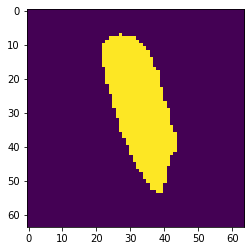

In [ ]:
Y = segmenta(X,120) #una buen umbral es 120
howis(Y)
plt.imshow(Y)
plt.show()

# Un ejemplo más complejo

In [ ]:
!wget https://www.dropbox.com/s/l6bntcx9c5o9723/rices.png

--2022-08-16 16:21:20--  https://www.dropbox.com/s/l6bntcx9c5o9723/rices.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l6bntcx9c5o9723/rices.png [following]
--2022-08-16 16:21:20--  https://www.dropbox.com/s/raw/l6bntcx9c5o9723/rices.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc278bd7434eb2d14ffaf872bd24.dl.dropboxusercontent.com/cd/0/inline/BrLqkFDpLirewhx8-Z8toKduLVjYd4ua5PH46i8KrbWOzMkd94RmfcUkrNFPX1DBEyJcQ630i5XpU1XzSZ9MKUus5StumBQaVQfft3mT7tdvHVlXX0cTvKgTRobPyb9T5ZFQA--B4cKvLkFuTxFL0Zco3JL0wG3NFsiQo1FHaYgQDw/file# [following]
--2022-08-16 16:21:21--  https://uc278bd7434eb2d14ffaf872bd24.dl.dropboxusercontent.com/cd/0/inline/BrLqkFDpLirewhx8-Z8toKduLVjYd4ua5PH46i8KrbWOzMkd94RmfcUkrNFPX1DBEyJcQ630i5

size =  (512, 512)
max  =  207
min  =  38


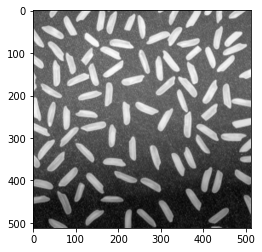

In [ ]:
img = imread('rices.png')
X   = img[:,:,0]
howis(X)
plt.imshow(X,cmap='gray')
plt.show()

Como el fondo no tiene iluminación constante, entonces un umbral global para toda la imagen no funciona bien.

Probar con 90, 110, 130 y 150

area =  55395


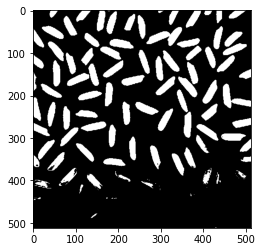

In [ ]:
Y = segmenta(X,150)
plt.imshow(Y,cmap='gray')
plt.show()

# Definición de imagen con fondo homogéneo

A cada fila se le resta el mínimo.

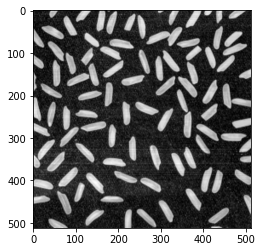

In [ ]:
(N,M) = X.shape
Xm    = np.zeros((N,M),np.uint8)
for i in range(N):
  xmin = np.min(X[i,:])
  Xm[i,:] = X[i,:] - xmin
plt.imshow(Xm,cmap='gray')
plt.show()

area =  68445


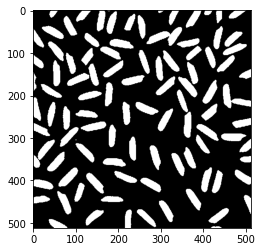

In [ ]:
Y = segmenta(Xm,60)
plt.imshow(Y,cmap='gray')
plt.show()